In [1]:
# Importación de librerias 

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats as st

# Paso 1: Carga de datos

In [2]:
# Paso 1: carga de datos

dfg = pd.read_csv('games.csv')
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se tien un total de **16,715** filas en el DataFrame

In [3]:
dfg.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
print(dfg['Year_of_Release'].min())
print(dfg['Year_of_Release'].max())

1980.0
2016.0


## Conclusiones

* El data set contiene datos de vídejuegos y sus ventas en diferentes regiones de Nort América, Europa y Japón, así como la información del nombre, género, año de lanzamiento y plataforma dónde fue lanzado.
* Se analizó un periodo de tiempo que comprende desde 1980 hasta 2016.
* Se cuenta con un total de 16,715 juegos registrados con los datos anteriores.
* Existen algunos problemas con los nombres de las columnas ya que deben estar en formato snake_case, así como los tipos de datos de algunas columnas como User_score y Year_of_Release.

# Paso 2: Preparar los datos

In [5]:
# Cambio de estilo de nombre de columas 
lower_names = []
for name in dfg.columns:
    lower_names.append(name.lower())

dfg.columns = lower_names
print(dfg.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
# Se eliminarono las filas donde la columna 'name' tiene datos NaN
dfg = dfg.dropna(subset=['name'])
dfg.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [7]:
# Cambio de tipos de datos de las columnas 'year_of_release' a int y 'user_score' a float
dfg['year_of_release'] = dfg['year_of_release'].fillna(np.nan)

In [8]:
dfg['user_score'] = dfg['user_score'].replace('tbd', np.nan)
dfg['user_score'] = dfg['user_score'].astype(float)

In [ ]:
#dfg['user_score'] = dfg['user_score'].replace('tbd', 'Unknown')
#dfg['user_score'] = dfg['user_score'].astype(float)

Para llenar los valores NaN de la columna de año de lanzamiento, se optó por usar NaN para marcar que nos e conoce el año, mientras que para la columna calificación de usuario se cambio los 'tbd' por NaN para poder convertir los datos a float. Se decidió no usar datos numéricos para no afectar las medidas de tendencia central en caso de ser necesario calcularlas.

In [9]:
# Calculo de las ventas totales para cada juego en todas las regiones

dfg['total_sales'] = dfg['na_sales'] + dfg['eu_sales'] + dfg['jp_sales'] + dfg['other_sales']
dfg.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


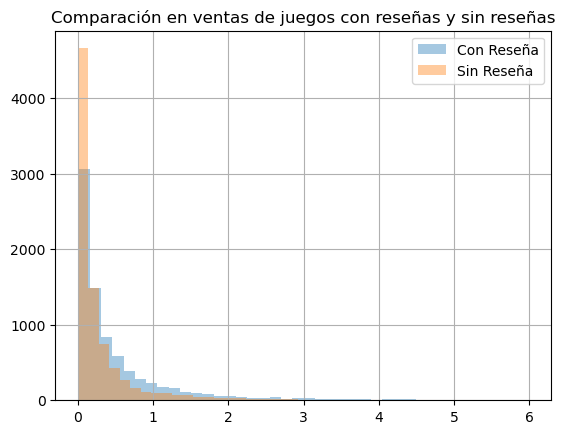

In [10]:
"""
Histograma para comparar los valores de 'total_sale' 
tomando como base la columna 'critic_score' con valores nulos y no nulos
"""
dfg[(~dfg['critic_score'].isna()) & (dfg['total_sales'] < 6)]['total_sales'].hist(bins = 40, label='Con Reseña', alpha=0.4)
dfg[(dfg['critic_score'].isna()) & (dfg['total_sales'] < 6)]['total_sales'].hist(bins = 40, label= 'Sin Reseña', alpha=0.4)
plt.legend()
plt.title('Comparación en ventas de juegos con reseñas y sin reseñas')
plt.show()

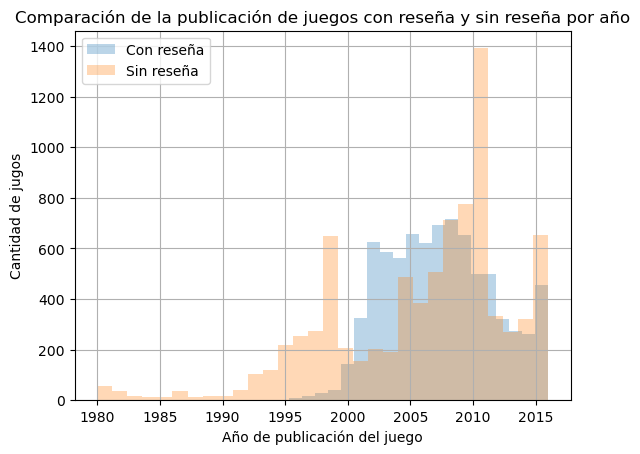

In [11]:
dfg[~dfg['critic_score'].isna()]['year_of_release'].hist(bins =30, label='Con reseña',alpha=0.3)
dfg[dfg['critic_score'].isna()]['year_of_release'].hist(bins =30, label='Sin reseña',alpha=0.3)
plt.title('Comparación de la publicación de juegos con reseña y sin reseña por año')
plt.xlabel('Año de publicación del juego')
plt.ylabel('Cantidad de jugos')
plt.legend()
plt.show()

El resultado de los gŕaficos anteriores indican que las reseñas de vídeojuegos iniciaron a mediados de los 90's debido en parte a la implementación de la internet y un incremento en la accesibilidad para los vídeojuegos. Por otro lado, existten múltiples factores por los cuáles no se hacen reseñas de vídeojuegos, por ejemplo de los años 80's a inicio de los 90's quízas eran escasos los medios que tomaron importancia hacia la industria y por lo tanto no se tomaban el tiempo de realizar y difundir reseñas, y en la actualidad podrían ser que se evalua si esto vale la pena o no considerando la relevancia del vídeojuego.

¿Cuántos juegos fueron lazados por año?

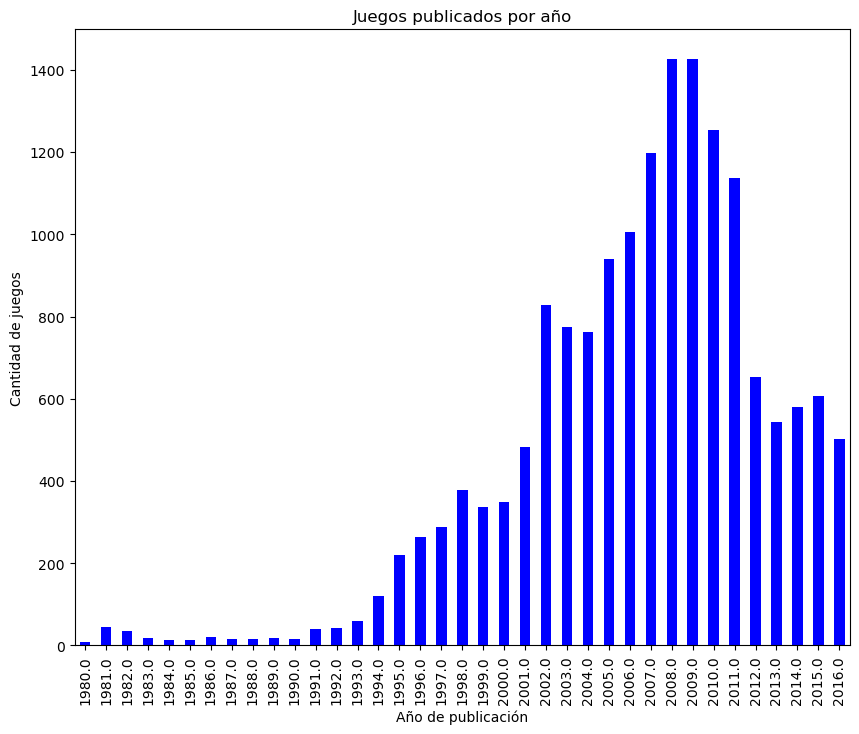

In [12]:
games_per_year = dfg.groupby('year_of_release')['name'].count()
"""Se decició trabajar con la columna de nombres ya que no presenta valores NaN"""

games_per_year.plot(kind ='bar',
                   color = 'blue',
                   rot = 90,
                   grid = False,
                   figsize = (10,8))
plt.title('Juegos publicados por año')
plt.ylabel('Cantidad de juegos')
plt.xlabel('Año de publicación')
plt.show()


In [13]:
# Cuota de mercado expresada en porcentajepor zona de ventas

na_s = np.round((dfg['na_sales'].sum() / dfg['total_sales'].sum()), 2)
eu_s = np.round((dfg['eu_sales'].sum() / dfg['total_sales'].sum()), 2)
jp_s = np.round((dfg['jp_sales'].sum() / dfg['total_sales'].sum()), 2)
ventas_totales = dfg['total_sales'].sum()

print(f'La cuota de mercado para la zona de Norte America fue de {na_s*100}%,para la zona de Europa fue de {eu_s*100}% y para la zona de Japón fue de {jp_s*100}%, teniendo una venta conjunat estimada en {ventas_totales} millones de dolares')

La cuota de mercado para la zona de Norte America fue de 49.0%,para la zona de Europa fue de 27.0% y para la zona de Japón fue de 15.0%, teniendo una venta conjunat estimada en 8913.29 millones de dolares


In [14]:
# Años con más juegos publicados 
games_per_year.sort_values(ascending = False).head(5).sort_index()
                                        

year_of_release
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
Name: name, dtype: int64

In [15]:
# Top 5 de años con más juegos publicados y las consolas a las que pertenecen
pivot_games_publisher = dfg.groupby(['year_of_release','platform'])['name'].count()
print(pivot_games_publisher.sort_values(ascending = False).head(5).sort_index())

year_of_release  platform
2007.0           DS          376
2008.0           DS          492
2009.0           DS          403
                 Wii         325
2010.0           DS          323
Name: name, dtype: int64


Los años donde hubo más lanzamientos de juegos fueron del 2007 al 2010 siendo las plataformas con más lanzamientos el nintendo DS y WII. El nintendo DS fue lanzado en 2004 y fue un éxito env entas con alrededor de 154 millones de consolas vendidas, también se consideró un innovación al incluir dos pantallas, una de ellas tácti. El nintendo WII fue lanzado en 2006, siendo también un éxito en ventas con 101 millones de consolas vendidas, así como la incorporación un mando distancia que se consideró una innovación tecnlógica, lo que lo llevo a ser la consola más vendida de la septima generación, superando en ventas al XBOX 360 y Play Station 3. 

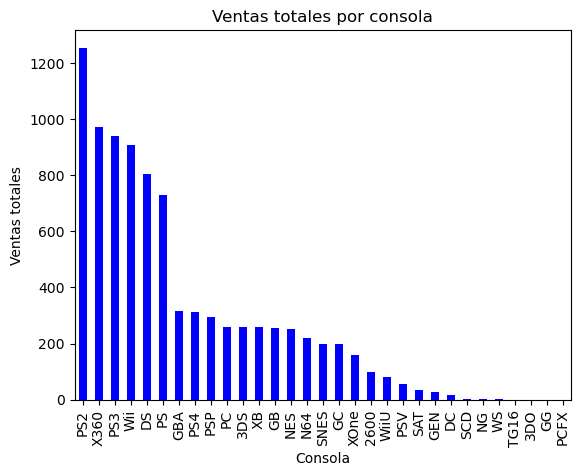

In [16]:
# Comparación  de ventas por plataforma y por año 

spp = dfg.groupby('platform')['total_sales'].sum()
spp.sort_values(ascending= False).plot(kind='bar', color ='blue')
plt.title('Ventas totales por consola')
plt.xlabel('Consola')
plt.ylabel('Ventas totales')
plt.show()

In [17]:
# Cuota de mercado por plataforma expresada en porcentaje
print(np.round((spp.sort_values(ascending= False) / dfg['total_sales'].sum())*100),2)

platform
PS2     14.0
X360    11.0
PS3     11.0
Wii     10.0
DS       9.0
PS       8.0
GBA      4.0
PS4      4.0
PSP      3.0
PC       3.0
3DS      3.0
XB       3.0
GB       3.0
NES      3.0
N64      2.0
SNES     2.0
GC       2.0
XOne     2.0
2600     1.0
WiiU     1.0
PSV      1.0
SAT      0.0
GEN      0.0
DC       0.0
SCD      0.0
NG       0.0
WS       0.0
TG16     0.0
3DO      0.0
GG       0.0
PCFX     0.0
Name: total_sales, dtype: float64 2


In [18]:
# El top 10 de consolas con mayores ventas
top_10_platfomrs = spp.sort_values(ascending= False).head(10)
print(top_10_platfomrs)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


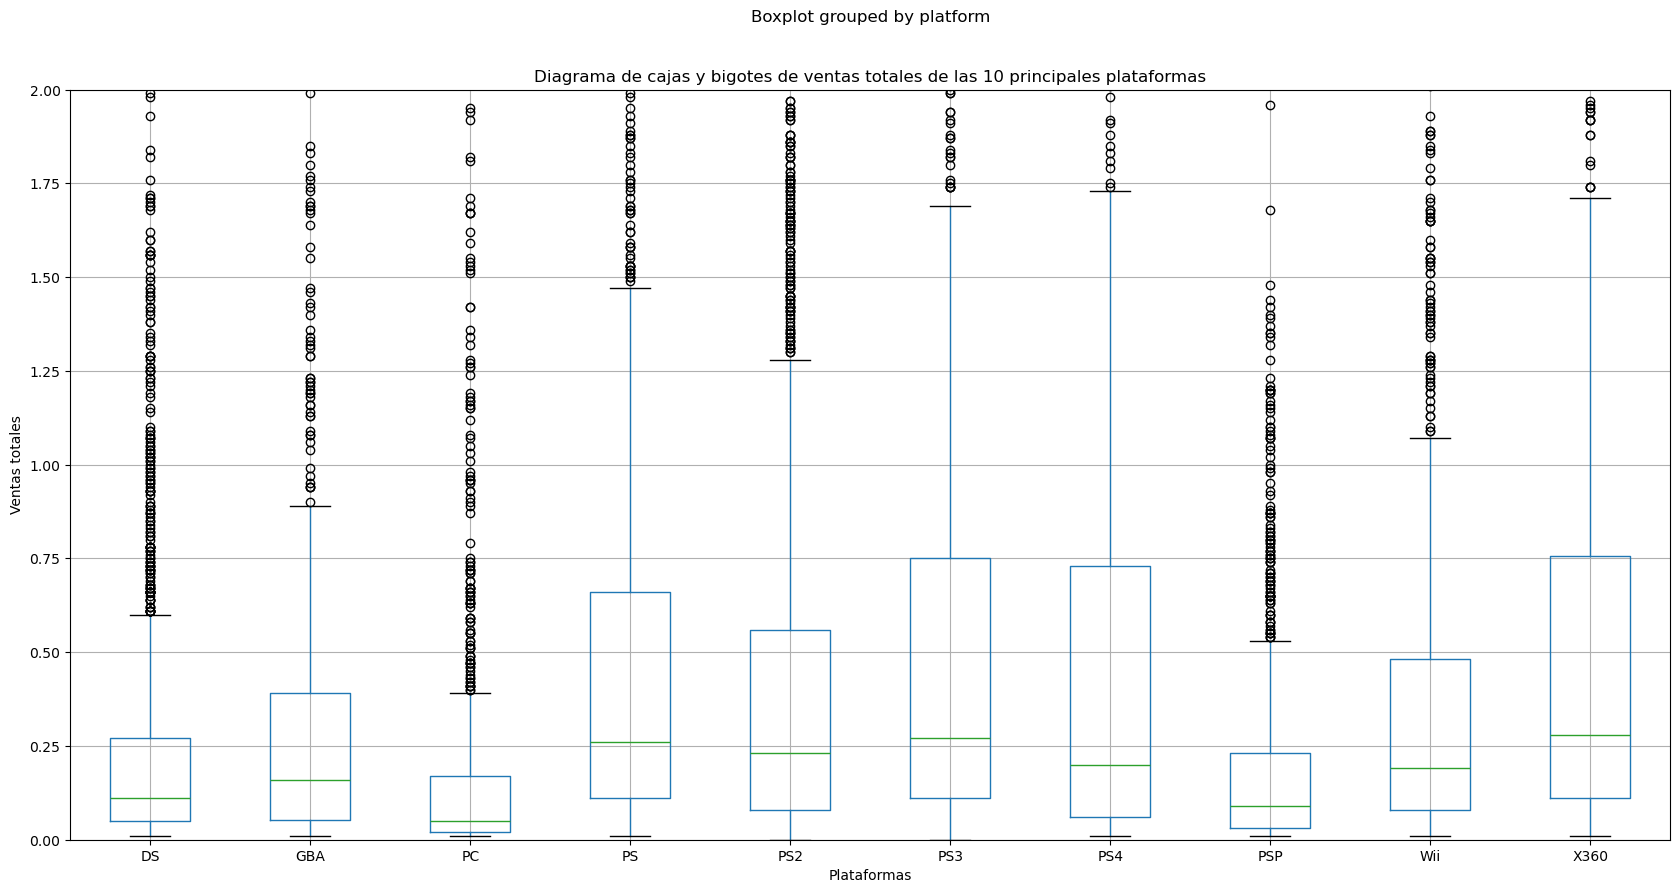

In [19]:
(
    dfg[dfg['platform'].isin(top_10_platfomrs.index)][['platform','total_sales']]
    .boxplot(by='platform', figsize =(20,10))
)
plt.title('Diagrama de cajas y bigotes de ventas totales de las 10 principales plataformas')
plt.xlabel('Plataformas')
plt.ylabel('Ventas totales')
plt.ylim(0,2)
plt.show()

In [20]:
# Venta media de las 10 principales consolas
sales_by_platform = dfg[dfg['platform'].isin(top_10_platfomrs.index)][['platform','total_sales']]
sales_by_platform.groupby('platform')['total_sales'].mean().sort_values(ascending = False)

platform
PS4     0.801378
X360    0.769746
PS3     0.705973
Wii     0.687508
PS      0.610576
PS2     0.581106
GBA     0.386679
DS      0.374765
PC      0.266448
PSP     0.243218
Name: total_sales, dtype: float64

In [21]:
# Distribución de ventas por plataforma y por año 
bx = dfg.groupby(['year_of_release','platform'])['total_sales'].sum()
print(bx)

year_of_release  platform
1980.0           2600        11.38
1981.0           2600        35.68
1982.0           2600        28.88
1983.0           2600         5.84
                 NES         10.96
                             ...  
2016.0           PSV          4.25
                 Wii          0.18
                 WiiU         4.60
                 X360         1.52
                 XOne        26.15
Name: total_sales, Length: 238, dtype: float64


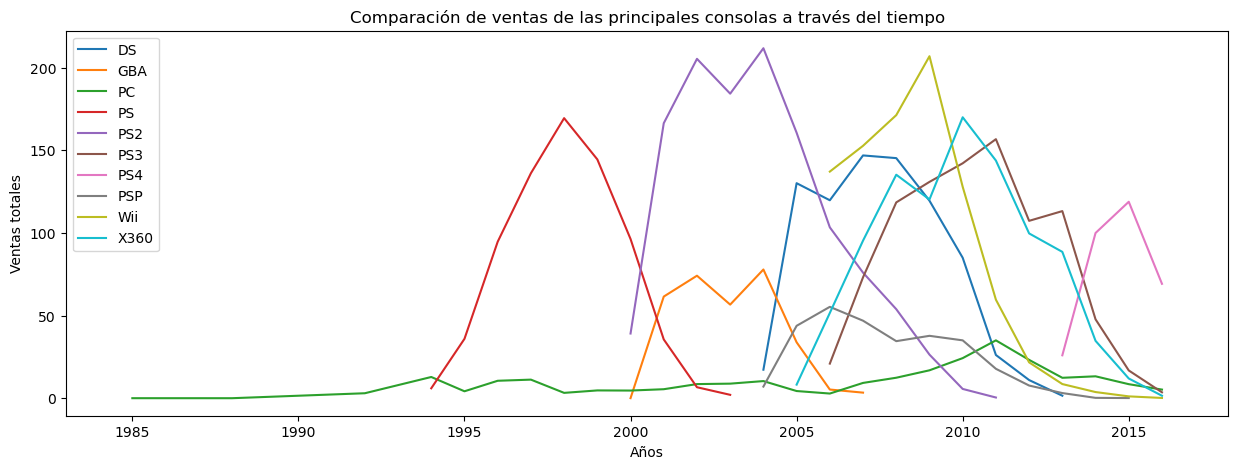

In [22]:
# Gráfico con las ventas anuales por plataforma y su comportamiento a lo largo del tiempo
platform_year_sales=(
    dfg[dfg['platform'].isin(top_10_platfomrs.index)].
    pivot_table(index='year_of_release', columns = 'platform', values ='total_sales', aggfunc ='sum')
)
  
platform_year_sales.plot(kind='line', figsize=(15,5))
plt.title('Comparación de ventas de las principales consolas a través del tiempo')
plt.ylabel('Ventas totales')
plt.xlabel('Años')
plt.xlim(1983,2018)
plt.legend()
plt.show()

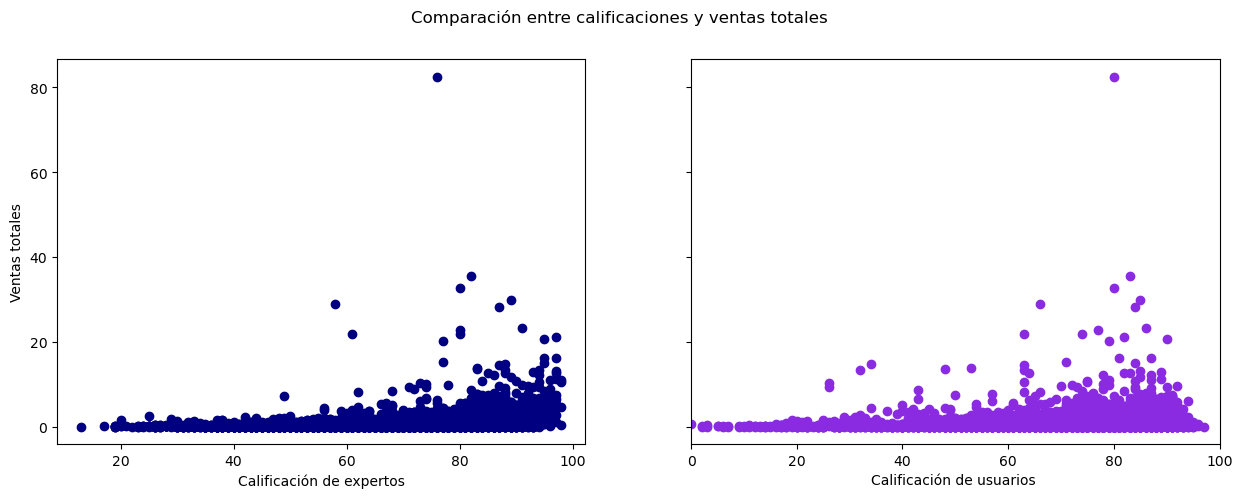

In [23]:
# Creación de una columna con el score de usuarios multiplicado por 10
dfg['user_score_100'] = dfg['user_score'] *10

# Se crean dos dataframes con las columnas de las puntuaciones y las ventas totales
cs_ts = dfg[['critic_score','total_sales']]
us_ts = dfg[['user_score_100', 'total_sales']]


# Se crea una figura compuesto de dos gráficos de dispersión
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))

ax1.scatter(cs_ts['critic_score'], cs_ts['total_sales'], color = 'navy')
ax1.set_xlabel("Calificación de expertos")
ax1.set_ylabel("Ventas totales")

ax2.scatter(us_ts['user_score_100'], us_ts['total_sales'], color = 'blueviolet')
ax2.set_xlabel("Calificación de usuarios ")
ax2.set_xlim(0,100)

plt.suptitle('Comparación entre calificaciones y ventas totales')

plt.show()

In [24]:
# El juego con mayores ventas
us_ts_n = dfg[['user_score', 'total_sales','name']]
us_ts_n[us_ts_n['total_sales'] == us_ts_n['total_sales'].max()]

,user_score,total_sales,name
0,8.0,82.54,Wii Sports


In [25]:
# Comparación de ventas del mísmo videojuego en las plataformas más populares
games_platforms = dfg.groupby('name')['platform'].nunique().reset_index()
games_platforms = games_platforms[games_platforms['platform'] > 1]['name']

games_top10_platforms =(
    dfg[(dfg['name'].isin(games_platforms)) & (dfg['platform'].isin(top_10_platfomrs.index))]
    .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
)

games_top10_platforms

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
name,,,,,,,,,,
Frozen: Olaf's Quest,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007: Quantum of Solace,0.13,NaN,0.02,NaN,0.43,1.15,NaN,NaN,0.65,1.48
007: The World is not Enough,NaN,NaN,NaN,0.92,NaN,NaN,NaN,NaN,NaN,NaN
11eyes: CrossOver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,0.02
18 Wheeler: American Pro Trucker,NaN,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
iCarly,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.45,NaN
iCarly 2: iJoin The Click!,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN
nail'd,NaN,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,0.11


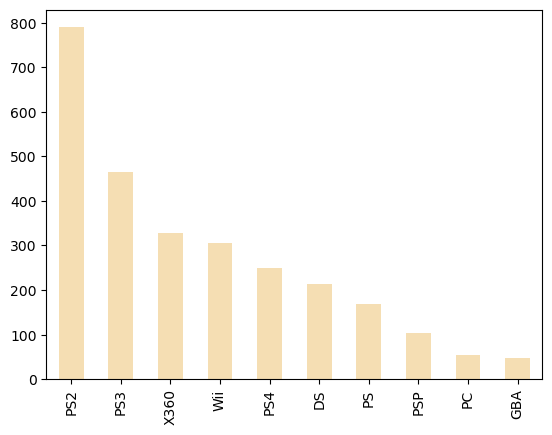

In [26]:
"""
Para los juegos publicados en múltiples plataformas se determinó cuáles fueron las plataformas 
con las versiones más caras
"""
games_top10_platforms.idxmax(axis =1).value_counts().plot(kind='bar', color ='wheat')
plt.show()

In [27]:
games_top10_platforms.idxmax(axis =1).value_counts()

PS2     790
PS3     466
X360    327
Wii     305
PS4     250
DS      214
PS      169
PSP     104
PC       55
GBA      48
Name: count, dtype: int64

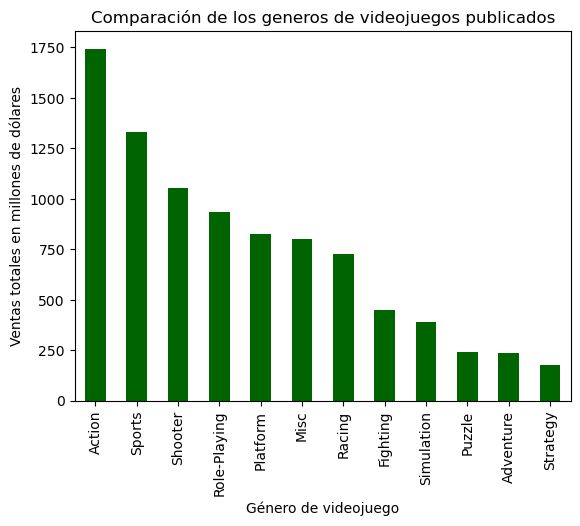

In [28]:
# Distribución de juegos por generos y sus ventas totales

dfg.groupby('genre')['total_sales'].sum().sort_values(ascending = False).plot(kind='bar', color='darkgreen')
plt.title('Comparación de los generos de videojuegos publicados')
plt.ylabel('Ventas totales en millones de dólares')
plt.xlabel('Género de videojuego')
plt.show()

## Conclusiones de la sección

    • Se eliminaron las dos filas con nombres vacíos. 
    • Se cambiaron los valores string por NaN en la columna de user_score y se cambiaron a tipo float.
    • Se calcularon las ventas totales y se sumaron en una nueva columnas llamada ‘total_sales’. 
    • Se determinó que los años con más videojuegos publicados fueron: 2008, 2009, 2010, 2007 y 2011 en ese orden. 
    • Las plataformas con más juegos publicados durante esos años fueron: DS y WII. 
    • Las 10 plataformas con mayores ventas son: PS2, X360, PS3, WII, DS, PS, GBA, PS4, PSP y PC. 
    • La distribución de las ventas de videojuegos por plataformas indica que las que tienen mayores ventas son PS3, PS4 y X360. Siendo la venta media más alta la del PS4. 
    • De acuerdo al gráfico que compara años y ventas para cada plataforma, se encontró que las plataformas con mayor vida fueron las de Play Station y la Xbox 360, siendo la PS4 la que aún se encuentra vigente.
    • Se encontró que existe una correlación positiva entre las reseñas de los usuarios y expertos y en las ventas de los vídeojuegos. Siendo el juego WII sports el que generó las mayores ventas.
    • En los juegos multiplataforma, se encontró que las versiones más caras fueron publicadas en PS2, seguido de la plataforma PS3. 
    • Los géneros con mayores ventas fueron: acción, deportes y disparos.
    * La cuota de mercado para la zona de Norte América fue de 0.49,para la zona de Europa fue de 0.27 y para la zona de Japón fue de 0.15

# 4 Crea un perfil de usuario para cada región. 

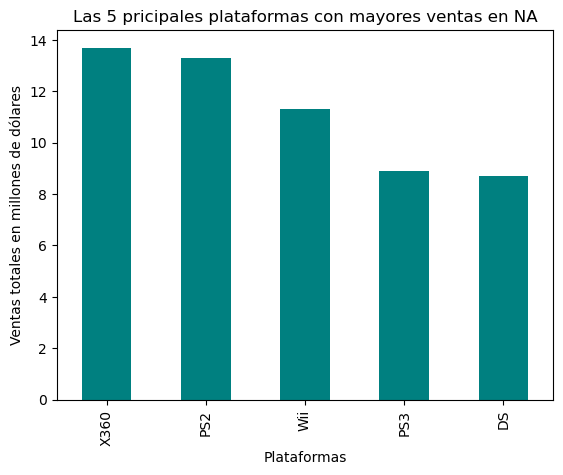

In [29]:
# Principales plataformas de NA
na_platforms = (
    dfg[['platform','na_sales']]
    .groupby('platform')['na_sales']
    .sum().sort_values(ascending= False).head(5)
)

na_platforms = np.round(na_platforms / dfg[['platform','na_sales']]['na_sales'].sum(), 3)*100
na_platforms.plot(kind='bar', color ='teal')
plt.title('Las 5 pricipales plataformas con mayores ventas en NA')
plt.xlabel('Plataformas')
plt.ylabel('Ventas totales en millones de dólares')
plt.show()

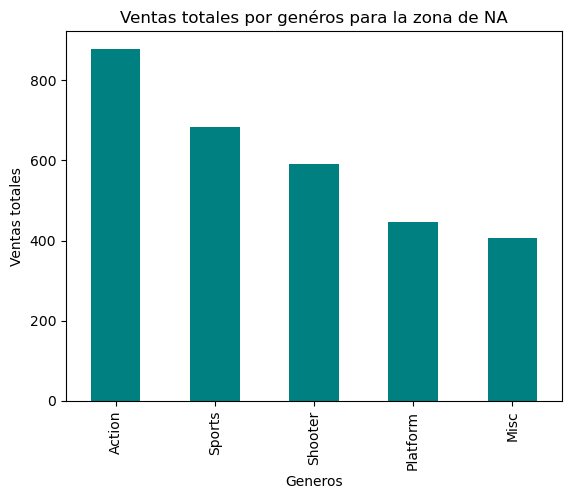

In [30]:
# Determinación de la cuota de mercado de los 5 principales géneros para la región de NA
na_genres = (
    dfg[['genre','na_sales']]
    .groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(5)
)
na_genres.plot(kind='bar', color ='teal')
plt.xlabel('Generos')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por genéros para la zona de NA')
plt.show()

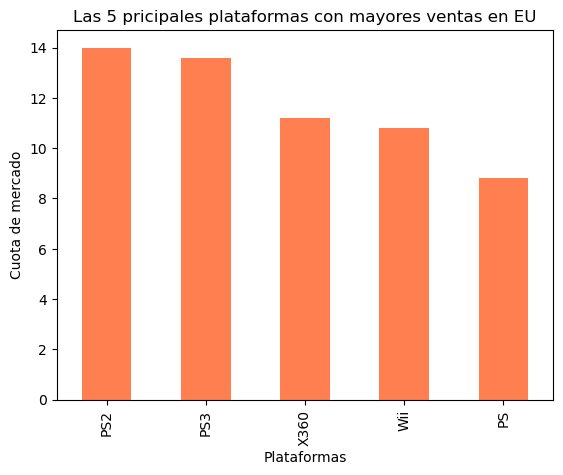

In [31]:
# Principales plataformas de EU
eu_platforms = (
    dfg[['platform','eu_sales']]
    .groupby('platform')['eu_sales']
    .sum().sort_values(ascending= False).head(5)
)

eu_platforms = np.round(eu_platforms / dfg[['platform','eu_sales']]['eu_sales'].sum(), 3)*100
eu_platforms.plot(kind='bar', color ='coral')
plt.title('Las 5 pricipales plataformas con mayores ventas en EU')
plt.xlabel('Plataformas')
plt.ylabel('Cuota de mercado')
plt.show()

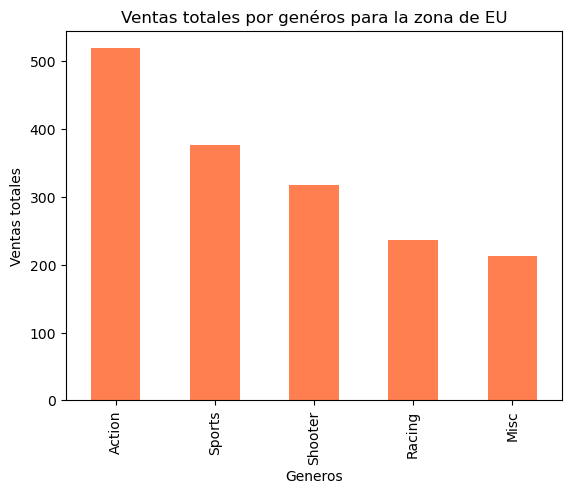

In [32]:
eu_genres = (
    dfg[['genre','eu_sales']]
    .groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5)
)
eu_genres.plot(kind='bar', color ='coral')
plt.xlabel('Generos')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por genéros para la zona de EU')
plt.show()

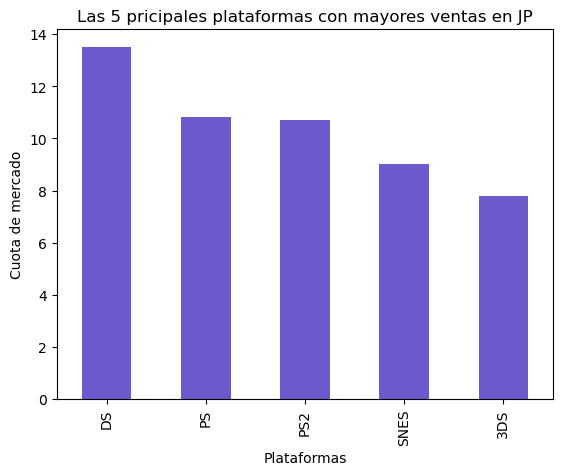

In [33]:
# Principales plataformas de JP
jp_platforms = (
    dfg[['platform','jp_sales']]
    .groupby('platform')['jp_sales']
    .sum().sort_values(ascending= False).head(5)
)

jp_platforms = np.round(jp_platforms /  dfg[['platform','jp_sales']]['jp_sales'].sum(), 3)*100
jp_platforms.plot(kind='bar', color ='slateblue')
plt.title('Las 5 pricipales plataformas con mayores ventas en JP')
plt.xlabel('Plataformas')
plt.ylabel('Cuota de mercado')
plt.show()

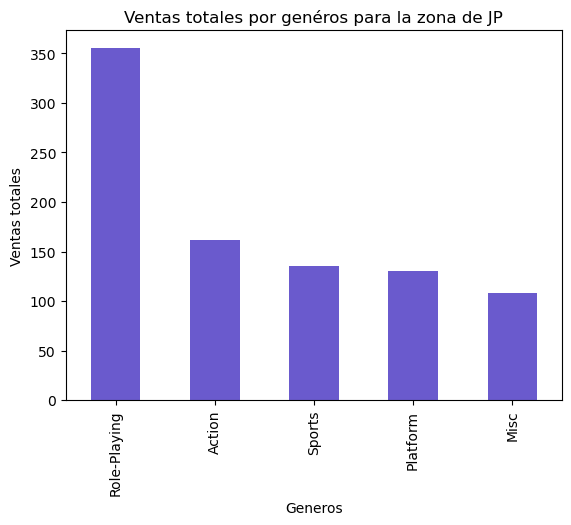

In [34]:
jp_genres = (
    dfg[['genre','jp_sales']]
    .groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5)
)
jp_genres.plot(kind='bar', color ='slateblue')
plt.xlabel('Generos')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por genéros para la zona de JP')
plt.show()

## Conclusiones de la sección 

    • En la región de NA, la consola más popular fue el Xbox360, con una cuota de mercado de cerca del 14%, siendo el género más popular el de acción con ventas totales de más de 800 millones de dólares.
    • En la región de EU, la consola más popular fue la PS2, con una cuota de mercado también de cerca del 14%, seguido muy de cerca por la PS3. El género más popular fue el de acción con ventas de cerca de 500 millones de dólares.
    • En la región  de JP, la consola más popular fue la DS, con una cuota de mercado de cerca del 14%, a diferencia de los mercados anteriores, el género más popular fue el de Role-playing, con ventas totales de 350 millones de dólares aproximadamente.

# Paso 5: pruebas de hipótesis

In [35]:
print(dfg['platform'].unique())
print()
print(dfg['genre'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [38]:
# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
xone_us = dfg[dfg['platform'] == 'XOne']['user_score'].fillna(dfg[dfg['platform'] == 'XOne']['user_score'].mean())
pc_us = dfg[dfg['platform']== 'PC']['user_score'].fillna(dfg[dfg['platform']== 'PC']['user_score'].mean())
xone_us_mean = np.round(dfg[dfg['platform'] == 'XOne']['user_score'].mean(), 3)
pc_us_mean = np.round(dfg[dfg['platform']== 'PC']['user_score'].mean(), 3)

alpha= 0.5
results = st.ttest_ind(xone_us, pc_us, equal_var= False)
print('El p valor es: ', results.pvalue)
if results.pvalue < alpha:
  print('Rechazamos la hipótesis nula, las medias son diferentes')
else:
  print('Aceptamos la hipótesis nula, las medias no son diferentes')
print('La varianza para los juegos')
print('Las medias de las calificaciones de los usuarios son: {} para Xbox One y {} para PC'.format(xone_us_mean,pc_us_mean))

El p valor es:  1.2287445891392381e-09
Rechazamos la hipótesis nula, las medias son diferentes
La varianza para los juegos
Las medias de las calificaciones de los usuarios son: 6.521 para Xbox One y 7.062 para PC


Prueba F: 32.77380147313544, con un p valor = 1.3024108209181294e-08
Razón de varianzas: 0.7584343935881753
La razón de la varianza es menor a 1 por lo tanto la primera varianza e menor que la segunda


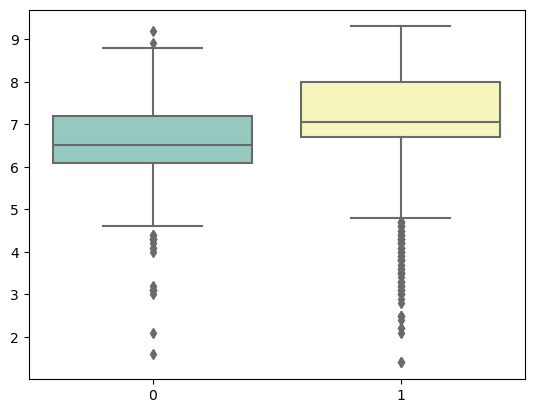

In [44]:
# Comparación de varianzas 
f_statistic, pvalue = st.f_oneway(xone_us, pc_us)
print('Prueba F: {}, con un p valor = {}'.format(f_statistic, pvalue))

# Razón de varianzas
ratio_variances = xone_us.var() / pc_us.var()
print('Razón de varianzas:', ratio_variances)

if ratio_variances < 1:
    print('La razón de la varianza es menor a 1 por lo tanto la primera varianza e menor que la segunda')

# Diagrama de caja
sns.boxplot(data=[xone_us, pc_us], palette='Set3')
plt.show()


In [39]:
# Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes
action_us = dfg[dfg['genre'] == 'Action']['user_score'].fillna(dfg[dfg['genre']=='Action']['user_score'].mean())
sports_us = dfg[dfg['genre'] == 'Sports']['user_score'].fillna(dfg[dfg['genre']== 'Sports']['user_score'].mean())

action_us_mean = np.round(dfg[dfg['genre'] == 'Action']['user_score'].mean(), 3)
sports_us_mean = np.round(dfg[dfg['genre'] == 'Sports']['user_score'].mean(), 3)

alpha = 0.5

results = st.ttest_ind(action_us, sports_us, equal_var= False)
print('El p valor es: ', results.pvalue)
if results.pvalue < alpha:
  print('Rechazamos la hipótesis nula, las medias son diferentes')
else:
  print('Aceptamos la hipótesis nula, las medias no son diferentes')
print('Las medias de las calificaciones de los usuarios son: {} para Acción One y {} para Deportes'.format(action_us_mean,sports_us_mean))

El p valor es:  0.0014279366509127062
Rechazamos la hipótesis nula, las medias son diferentes
Las medias de las calificaciones de los usuarios son: 7.054 para Acción One y 6.961 para Deportes


Prueba F: 10.363986750258004, con un p valor = 0.0012921578271952294
Razón de varianzas: 0.905006991416316
La razón de la varianza es menor a 1 por lo tanto la primera varianza e menor que la segunda


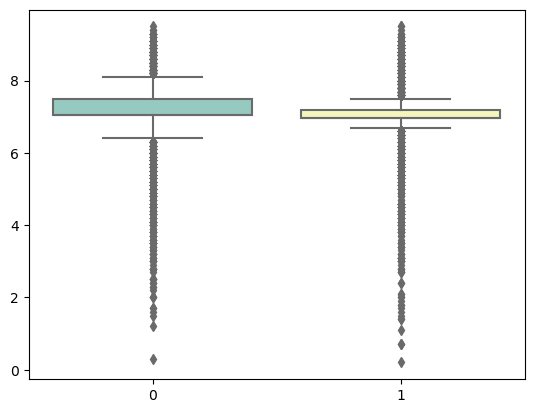

In [45]:
f_statistic, pvalue = st.f_oneway(action_us, sports_us)
print('Prueba F: {}, con un p valor = {}'.format(f_statistic, pvalue))

# Razón de varianzas
ratio_variances = action_us.var() / sports_us.var()
print('Razón de varianzas:', ratio_variances)

if ratio_variances < 1:
    print('La razón de la varianza es menor a 1 por lo tanto la primera varianza e menor que la segunda')

# Diagrama de caja
sns.boxplot(data=[action_us, sports_us], palette='Set3')
plt.show()


# Conclusiones de la sección:
El presente análisis se basa en un conjunto de datos que abarca información sobre la venta de videojuegos en tres zonas (Norteamérica, Europa y Japón) durante el periodo de 1980 a 2016. Se incluyen detalles sobre el género del videojuego, año de publicación, nombre y consola de lanzamiento. El conjunto de datos contiene un total de 16.715 registros.

### Zonas de venta:
    • Norte América (NA) lidera las ventas con una cuota de mercado del 49%, seguida por Europa (EU) con un 25% y Japón (JP) con un 15%. 
### Publicaciones y ventas por consola:
    • Los años con mayor cantidad de publicaciones de videojuegos se ubican entre 2007 y 2011. 
    • Las consolas con mayor cantidad de publicaciones son el DS y la Wii. 
    • Las consolas con mayores ventas son la PS2, la X60 y la PS3, mientras que el Wii y el DS se ubican en la cuarta y quinta posición respectivamente. 
### Ventas medias por plataforma:
    • La plataforma con la venta media más alta es la PS4, seguida por la X360 y la PS3. 
    • Este resultado podría deberse al aumento en los costos de los videojuegos debido a las nuevas tecnologías empleadas en su desarrollo. 
    • La PS4 se encuentra en el octavo lugar de ventas totales, aunque cabe destacar que al momento del análisis no se cuenta con datos para determinar su popularidad actual. 
### Ventas por consola a lo largo del tiempo:
    • La PC se mantiene relativamente constante en sus ventas y no declina como las generaciones de consolas. 
    • Algunas de las consolas con mayor vigencia son la PS2, la X360, la PS3 y la Wii. 
### Relación entre ventas y críticas:
    • Se encontró una correlación positiva entre las ventas y las críticas (de usuarios o expertos) de los videojuegos. 
### Juegos publicados en más de una plataforma:
    • Las versiones más caras de juegos publicados en más de una plataforma dentro de una generación de consolas se encuentran en la PS2, seguida por la PS3. 
    • El género más popular de videojuegos es el de acción. 
### Análisis por zona:
    • Norteamérica: La consola más popular es la X360 y el género más popular es el de acción. 
    • Europa: La consola más popular es la PS2 y el género más popular es el de acción. 
    • Japón: La consola más popular es la DS y el género más popular es el de rol. 
### Conclusiones:
    • El mercado de videojuegos ha experimentado un crecimiento significativo durante el periodo analizado. 
    • Existen diferencias notables en las preferencias de consolas y géneros entre las diferentes zonas. 
    • La PS4, a pesar de tener un precio elevado, presenta una alta venta media, lo que podría indicar una mayor disposición de los consumidores a pagar por experiencias de juego más sofisticadas. 
    • La PC se mantiene como una plataforma de juego consistente a lo largo del tiempo. 
    • Las ventas y las críticas de los videojuegos están positivamente relacionadas. 

